# Digital Signal Processing Class: Report 001


### Import base libaries


In [1]:
from matplotlib import pyplot
from numpy import ndarray, arange, array


### Exercises 1.1


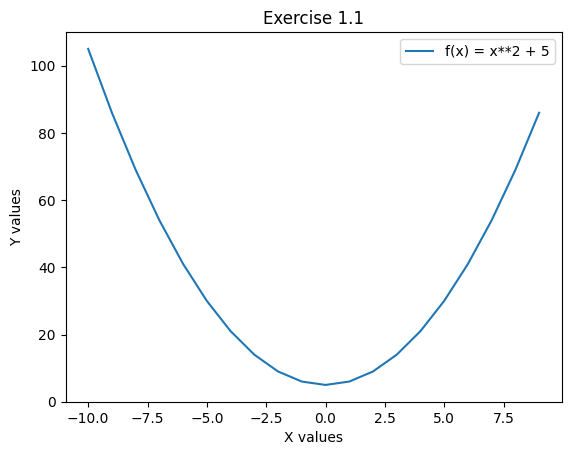

In [2]:
# Values for plot
x_values: ndarray = arange(-10, 10, 1, int)
y_values: ndarray = array([])

# Calculate values and insert to array
ys: list = []
for x in x_values:
    ys.append(x ** 2 + 5)

# Convert ys array to numpy array datatype
y_values: ndarray = array(ys)

# Configure Plot and Legend
_, ax = pyplot.subplots()

ax.plot(x_values, y_values, label='f(x) = x**2 + 5')
ax.set_title('Exercise 1.1')
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.legend()

# Show plot
pyplot.show()
